## Import dependencies

In [478]:
from src.integration import *
from src.model import *
# from bifurcation import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

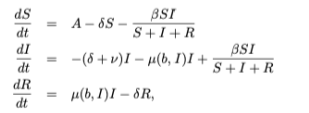

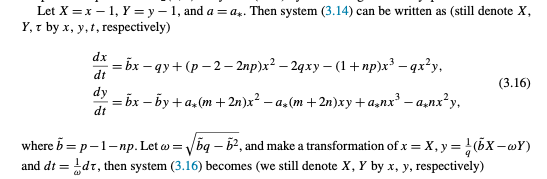

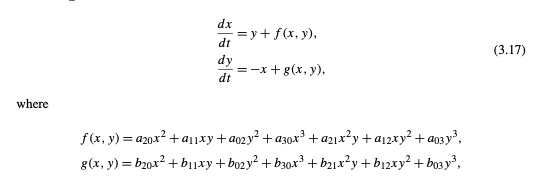

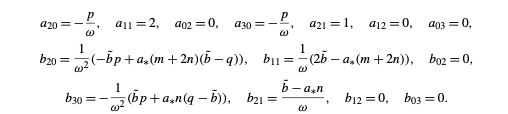

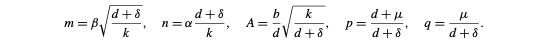

In [686]:
def normalform(x, y, alpha):
    # hard coded values
    mu = 0.5 # mu is greater than 0 and is the natural recovery rate of infective individuals
    lam = 0.5  # lambda is greater than 0 and is the rate at which recovered individuals lose immunity
    k = 0.5 # k is the infection rate
    m = 10
    beta = -2 * math.sqrt(alpha) # beta is greater than the square root of alpha multipled with -2
    
    # m = beta * math.sqrt((d+lam)/k)
    
    n = alpha * ((d + lam) / k)
    p = (d + mu) / (d + lam) 
    a = (p - 1 - n*p) / (n +m+1)
    q = mu / (d + lam)
    b_tilda = p - 1 - n * p
    w = math.sqrt(abs(b_tilda * q - b_tilda * b_tilda))
    a_20 = - p / w
    a_11 = 2
    a_2 = 0
    a_30 = -p / w
    a_21 = 1 
    a_12 = 0 
    a_3 = 0
    
    b_20 = (1 / w**2) * ( - b_tilda * p + a * (m + 2*n) * (b_tilda - q))
    b_11 = (2 * b_tilda - a * (m+2 * n))
    b_30 = - (1 / w * w) * (b_tilda * p + a * (m + 2 * n) * (b_tilda - q))
    b_21 = (b_tilda - a * n) / w
    b_12 = 0
    b_3 = 0
    b_2 = 0
    
    # known as the u
    f = a_20 * x ** 2 + a_11 * x * y + a_2 * y ** 2 + a_30 * x ** 3 + a_21 * x ** 2 * y + a_12 * x * y ** 2 + a_3 * y ** 3
    # known as the v
    g = b_20 * x ** 2 + b_11 * x * y + b_2 * y ** 2 + b_30 * x ** 3 + b_21 * y * x ** 2 + b_12 * x * y ** 2 + b_3 * y ** 3

            
    return [f, g]


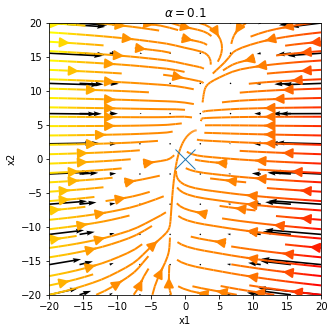

In [711]:
range_x=(-20, 20)
range_y=(-20, 20)
num_grid_points=10

alpha = 0.1

x, y = np.meshgrid(np.linspace(range_x[0], range_x[1], num_grid_points),np.linspace(range_y[0], range_y[1], num_grid_points))
u, v = np.zeros_like(x), np.zeros_like(y)

# Andronov_Hopf normal form
normalforms = normalform(x, y, alpha)
u = y + normalforms[0]
v = -x + normalforms[1]

plt.figure(figsize=(5, 5))
plt.streamplot(x, y, u, v, linewidth=2, arrowsize=2, color=u, cmap='autumn')
plt.quiver(x, y, u, v)
plt.plot(0, 0, marker="x", markersize=20)

plt.axis('square')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(r'$\alpha={0}$'.format(alpha))

plt.show()

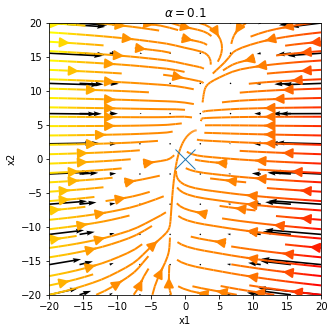

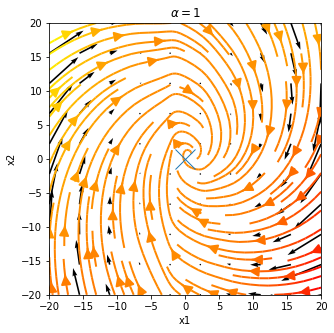

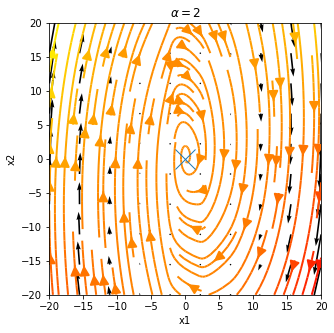

In [712]:
list_alpha = [0.1,1,2]
for alpha in list_alpha :  
    x, y = np.meshgrid(np.linspace(range_x[0], range_x[1], num_grid_points),np.linspace(range_y[0], range_y[1], num_grid_points))
    u, v = np.zeros_like(x), np.zeros_like(y)

    # Andronov_Hopf normal form
    normalforms = normalform(x, y, alpha)
    u = y + normalforms[0]
    v = -x + normalforms[1]

    plt.figure(figsize=(5, 5))
    plt.streamplot(x, y, u, v, linewidth=2, arrowsize=2, color=u, cmap='autumn')
    plt.quiver(x, y, u, v)
    plt.plot(0, 0, marker="x", markersize=20)

    plt.axis('square')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(r'$\alpha={0}$'.format(alpha))

    plt.show()

## Backup for now, will remove later

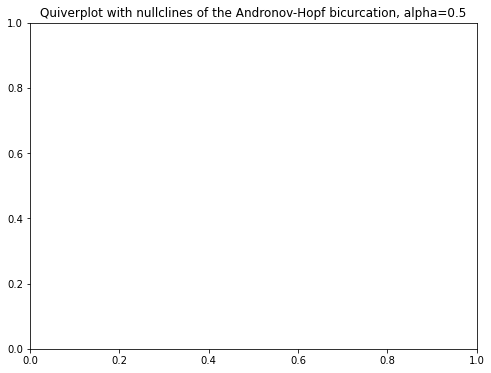

In [594]:
alpha = 0.5

# initialize lists containing values
x = []
y = []

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  100)

# initial values: x0 = 10, y0 = 2
Sys0 = np.array([1, 2])

X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)

for i in X:
    new_X.append([i[0],i[1]])

x,y = np.array(new_X).T

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

ax4.set_title("Quiverplot with nullclines of the Andronov-Hopf bicurcation, alpha=0.5")

# define a grid and compute direction at each point
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

# compute orbits

# define initial values
y0_0 = (0.25, 0.25)
y0_1 = (- 0.25, - 0.25)
y0_2 = (- 1, 1)

# define time span
t_span = (0.0, 20.0)  # start and end times


In [517]:
def Sys(X, t=0, alpha=1):
    # here X[0] = x and x[1] = y    
    # hard coded values
    mu = 10
    lam = 0.5
    k = 10
    
    n = alpha * ((d + lam) / k)
    a = 1 / X[0] ** 2
    p = (d + mu) / (d + lam) 
    q = mu / (d + lam)
    b_tilda = p - 1 - n * p
    w = math.sqrt(abs(b_tilda * q - b_tilda * b_tilda))
    a_20 = - p / w
    a_11 = 2
    a_2 = 0
    a_30 = -p / w
    a_21 = 1 
    a_12 = 0 
    a_3 = 0
    
    # b_20 = (- b_tilda * p+ A(m + 2 * n) * (b_tilda - q)) * (1 / (w * w))
    b_20 = (1 / w**2) * ( - b_tilda * p + a * (m + 2*n) * (b_tilda - q))
    b_11 = (2 * b_tilda - a * (m+2 * n))
    b_30 = - (1 / w * w) * (b_tilda * p + a * (m + 2 * n) * (b_tilda - q))
    b_21 = (b_tilda - a * n) / w
    b_12 = 0
    b_3 = 0
    b_2 = 0
            
    # known as the v
    g = b_20 * X[0] ** 2 + b_11 * X[0] * X[1] + b_2 * X[1] ** 2 + b_30 * X[0] ** 3 + b_21 * X[1] * X[0] ** 2 + b_12 * X[0] * X[1] ** 2 + b_3 * X[1] ** 3
        # known as the u
    f = a_20 * X[0] ** 2 + a_11 * X[0] * X[1] + a_2 * X[1] ** 2 + a_30 * X[0] ** 3 + a_21 * X[0] ** 2 * X[1] + a_12 * X[0] * X[1] ** 2 + a_3 * X[1] ** 3
            
    return np.array([f, g])

In [518]:
"""
ode for the solve_ivp function, special order of arguments
"""
def ode(t, state, alpha):
    # Andronov_Hopf normal form
    normalforms = normalform(x, y, alpha)
    u = normalforms[0]
    v = normalforms[1]
    x, y = state
    
    dx = u
    dy = v
    
    return dx, dy


In [513]:
# solve ivp
sol = solve_ivp(ode, t_span, y0_0, args=[alpha], t_eval=t)
sol_x0, sol_y0 = sol.y

sol = solve_ivp(ode, t_span, y0_1, args=[alpha], t_eval=t)
sol_x1, sol_y1 = sol.y

sol = solve_ivp(ode, t_span, y0_2, args=[alpha], t_eval=t)
sol_x2, sol_y2 = sol.y

# plot the orbits
ax4.plot(sol_x0, sol_y0, c='red')   
ax4.plot(sol_x1, sol_y1, c='blue')    
ax4.plot(sol_x2, sol_y2, c='yellow')            

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.grid()

fig2.savefig('andronov_hopf_orbits.png', dpi=150)

UnboundLocalError: local variable 'x' referenced before assignment

## Hopf Bifurcation

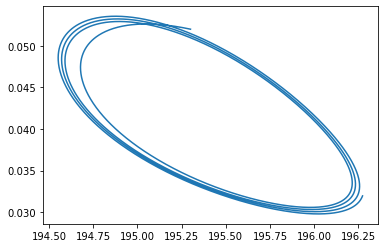

In [342]:
t_0 = 0
t_end = 200

beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

t = np.linspace(t_0, t_end, 3000)

model = SIR(t_0, t_end, beta, A, d, nu, b, mu0, mu1)

sol_s, sol_i, sol_r = euler(model.integration_model, y0, t)

plt.plot(sol_s, sol_i);

In [339]:
#S, I = np.linspace(2,2, 100), np.linspace(2,2, 100)
w = 3
# I, S = np.mgrid[-w:w:100j, -w:w:100j]
i, s = I[:,0], S[0,:]

In [340]:
fig = plt.figure(figsize=(10, 20))
# gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
# ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(s, i, sol_s, sol_i, density=[1], linewidth=2)
ax0.set_title('Hopf Bifurcation')

ValueError: 'u' and 'v' must match the shape of 'Grid(x, y)'

<Figure size 720x1440 with 0 Axes>

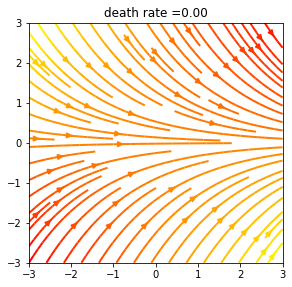

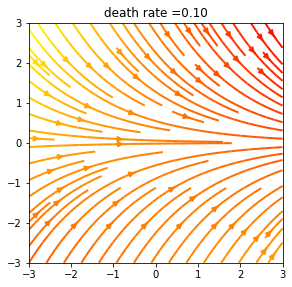

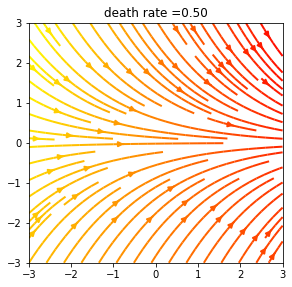

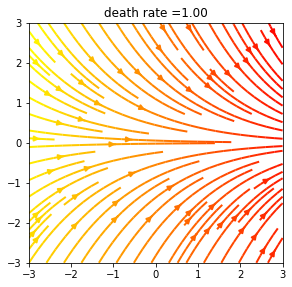

In [341]:
#S, I = np.linspace(2,2, 100), np.linspace(2,2, 100)
w = 3
I, S = np.mgrid[-w:w:100j, -w:w:100j]

for d in [0, 0.1, 0.5, 1]:
    dSdt = A - d * S - (beta * S * I) / (S + I + R)
    dIdt = - (d + nu) * I - m * I + (beta * S * I) / (S + I + R)
    
    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(s, i, dSdt, dIdt, density=[1], color=dSdt, linewidth=2, cmap='autumn')
    ax0.set_title("death rate =" + f"{d:.2f}")

In [315]:
#for i in X:
#    new_X.append([i[0],i[1]])

# x,y = np.array(new_X).T

## Hopf Bifurcation for SIR